### 0.导入函数库

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from utilities.location import geiger_locate
from utilities.location import geiger_locate_lat_lon
from obspy import read_inventory
from obspy import read_events
import logging
logging.basicConfig(
    format="%(name)s\t%(levelname)s\t%(message)s", 
    level=logging.INFO)

### 1.台站坐标转换

### 2.单台后方位角计算

### 3.geiger计算

Geiger	INFO	Starting model has residual of 3.18
Geiger	INFO	Model updated to: (time 0.31, x 10.59, y 4.34 z 11.57)
Geiger	INFO	Updated model has residual of 0.70
Geiger	INFO	Model updated to: (time -0.00, x 10.02, y 4.00 z 12.02)
Geiger	INFO	Updated model has residual of 0.01
Geiger	INFO	Model updated to: (time 0.00, x 10.00, y 4.00 z 12.00)
Geiger	INFO	Updated model has residual of 0.00
Geiger	INFO	Model has reached convergence threshold


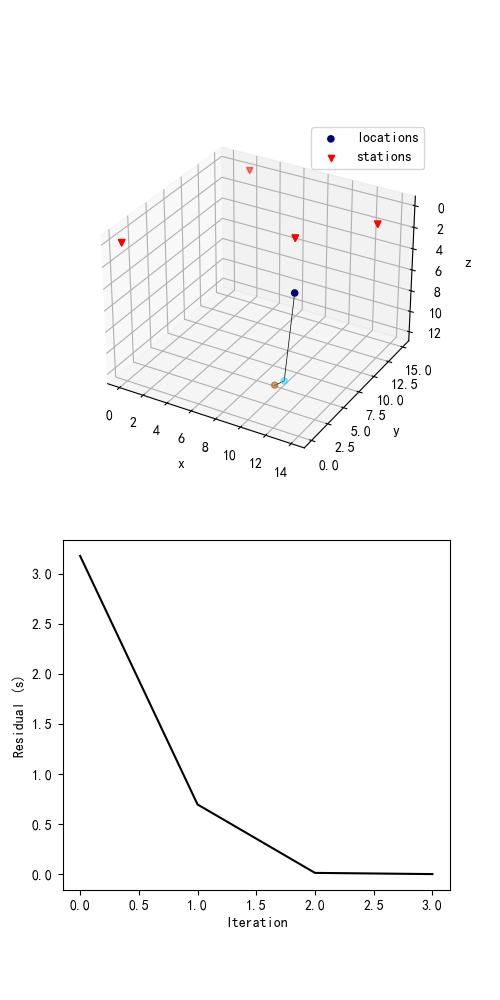

Found a solution at x = 10.00, y = 4.00, z = 12.00, time = 0.00


In [2]:
known_location = {"x": 10.0, "y": 4.0, "z": 12.0, "time": 0.0}
vp = 5.0
vs = 3.0

stations = [
    {"x": 0, "y": 0, "z": 0},
    {"x": 2, "y": 15, "z": 0},
    {"x": 10, "y": 7, "z": 0},
    {"x": 14, "y": 12, "z": 0}]

p_times = np.zeros(len(stations))
s_times = np.zeros_like(p_times)

for i, station in enumerate(stations):
    distance = (
        (station["x"] - known_location["x"]) ** 2 +
        (station["y"] - known_location["y"]) ** 2 + 
        (station["z"] - known_location["z"]) ** 2) ** 0.5
    p_times[i] = distance / vp
    s_times[i] = distance / vs

inverted_model = geiger_locate(
    p_times=p_times, p_locations=stations, s_times=s_times,
    s_locations=stations, vp=vp, vs=vs, starting_depth=5.0, plot=True)

print("Found a solution at x = {0:.2f}, y = {1:.2f}, z = {2:.2f}, "
      "time = {3:.2f}".format(inverted_model["x"], inverted_model["y"],
                              inverted_model["z"], inverted_model["time"]))

Geiger	INFO	Starting model has residual of 3.85
Geiger	INFO	Model updated to: (time 0.80, x 8.88, y 4.02 z 8.97)
Geiger	INFO	Updated model has residual of 0.73
Geiger	INFO	Model updated to: (time 0.76, x 8.25, y 3.84 z 8.48)
Geiger	INFO	Updated model has residual of 0.55
Geiger	INFO	Model updated to: (time 0.76, x 8.27, y 3.86 z 8.44)
Geiger	INFO	Updated model has residual of 0.55
Geiger	INFO	Model has reached convergence threshold


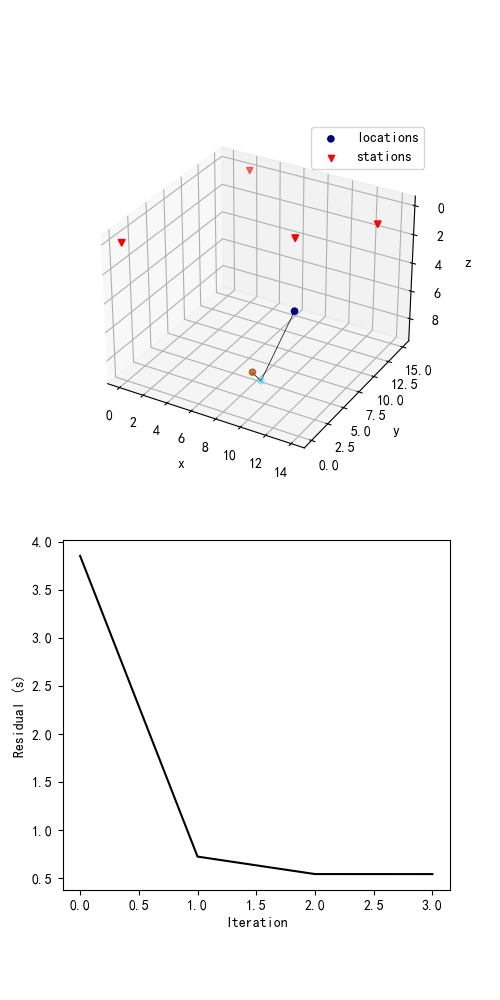

Solution at x = 8.27, y = 3.86, z = 8.44, time = 0.76


In [3]:
np.random.seed(42)
p_times = [time + np.random.sample() - .5 for time in p_times]
s_times = [time + np.random.sample() - .5 for time in s_times]

inverted_model = geiger_locate(
    p_times=p_times, p_locations=stations, s_times=s_times,
    s_locations=stations, vp=vp, vs=vs, starting_depth=5.0, plot=True)

print("Solution at x = {0:.2f}, y = {1:.2f}, z = {2:.2f}, "
      "time = {3:.2f}".format(inverted_model["x"], inverted_model["y"],
                              inverted_model["z"], inverted_model["time"]))

Geiger	INFO	Starting model has residual of 6.03
Geiger	INFO	Model updated to: (time 0.21, x 10.10, y 4.44 z 11.89)
Geiger	INFO	Updated model has residual of 1.63
Geiger	INFO	Model updated to: (time -0.09, x 10.30, y 3.96 z 12.07)
Geiger	INFO	Updated model has residual of 1.11
Geiger	INFO	Model updated to: (time -0.09, x 10.30, y 3.95 z 12.06)
Geiger	INFO	Updated model has residual of 1.11
Geiger	INFO	Model updated to: (time -0.09, x 10.30, y 3.95 z 12.06)
Geiger	INFO	Updated model has residual of 1.11
Geiger	INFO	Model updated to: (time -0.09, x 10.30, y 3.95 z 12.06)
Geiger	INFO	Updated model has residual of 1.11
Geiger	INFO	Model has reached convergence threshold


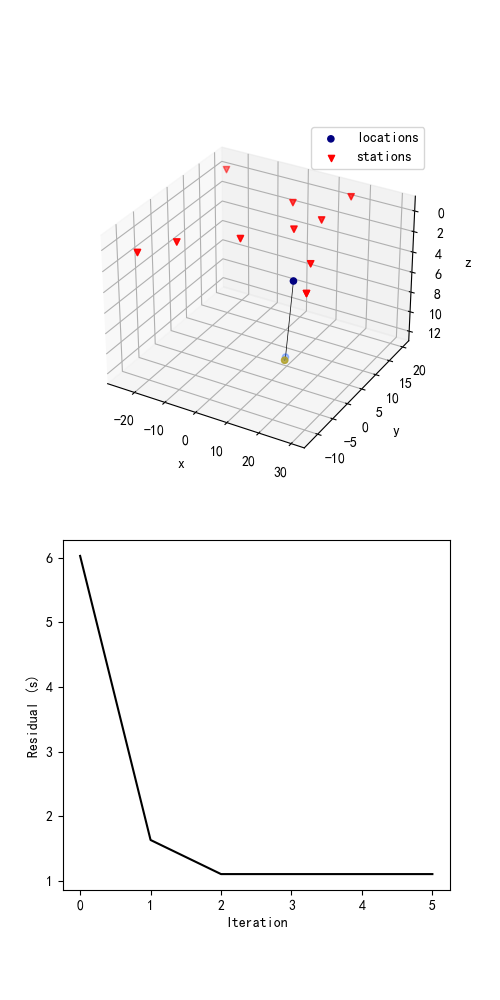

Found a solution at x = 10.30, y = 3.95, z = 12.06, time = -0.09


In [4]:
stations = [
    {"x": 0, "y": 0, "z": 0},
    {"x": 2, "y": 15, "z": 0},
    {"x": 10, "y": 7, "z": 0},
    {"x": 14, "y": 12, "z": 0},
    {"x": 20, "y": 2, "z": 1.2},
    {"x": 16, "y": 20, "z": -0.5},
    {"x": -20, "y": -12, "z": 0},
    {"x": -14, "y": -6, "z": 0},
    {"x": 30, "y": -10, "z": 0},
    {"x": -25, "y": 20, "z": 0}]

p_times = np.zeros(len(stations))
s_times = np.zeros_like(p_times)

for i, station in enumerate(stations):
    distance = (
        (station["x"] - known_location["x"]) ** 2 +
        (station["y"] - known_location["y"]) ** 2 + 
        (station["z"] - known_location["z"]) ** 2) ** 0.5
    p_times[i] = distance / vp
    s_times[i] = distance / vs

p_times = [time + np.random.sample() - .5 for time in p_times]
s_times = [time + np.random.sample() - .5 for time in s_times]
    
inverted_model = geiger_locate(
    p_times=p_times, p_locations=stations, s_times=s_times,
    s_locations=stations, vp=vp, vs=vs, convergence=0.00001, 
    starting_depth=5.0, plot=True)

print("Found a solution at x = {0:.2f}, y = {1:.2f}, z = {2:.2f}, "
      "time = {3:.2f}".format(inverted_model["x"], inverted_model["y"],
                              inverted_model["z"], inverted_model["time"]))

Geiger	INFO	Starting model has residual of 15.90
Geiger	INFO	Model updated to: (time -3.18, x 9.45, y -5.84 z 17.34)
Geiger	INFO	Updated model has residual of 3.19
Geiger	INFO	Model updated to: (time -3.35, x 9.41, y -5.61 z 15.39)
Geiger	INFO	Updated model has residual of 2.80
Geiger	INFO	Model updated to: (time -3.35, x 9.42, y -5.61 z 15.23)
Geiger	INFO	Updated model has residual of 2.80
Geiger	INFO	Model updated to: (time -3.35, x 9.42, y -5.61 z 15.22)
Geiger	INFO	Updated model has residual of 2.80
Geiger	INFO	Model has reached convergence threshold


We have 7 S picks and 15 P picks.


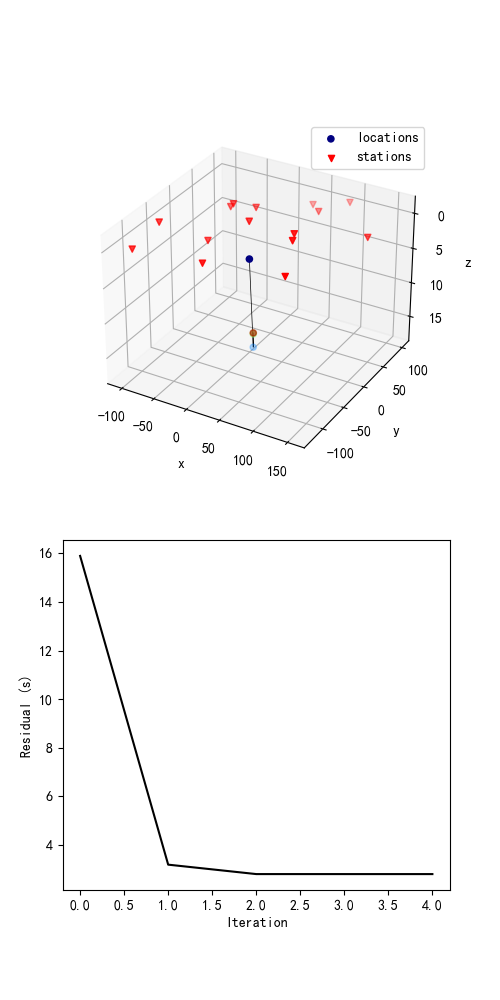

GeoNet location: -44.27 latitude, 169.36 longitude, 5.26 depth (km) 2019-05-08T20:03:32.781766Z origin time
Homogeneous model location: -44.28 latitude, 169.35 longitude, 15.22 depth (km) 2019-05-08T20:03:32.479961Z origin time


In [5]:
event = read_events("../data/event_2019345502.xml")[0]
inventory = read_inventory("../data/stations_2019345502.xml")

p_times, p_locations, s_times, s_locations = ([], [], [], [])

for pick in event.picks:
    try:
        loc = inventory.get_coordinates(pick.waveform_id.get_seed_string())
    except:
        print("No location found for {0}".format(
            pick.waveform_id.get_seed_string()))
        continue
    if pick.phase_hint == "P":
        p_times.append(pick.time)
        p_locations.append(
            {"lat": loc["latitude"], "lon": loc["longitude"], 
             "z": loc["elevation"] / 1000.})
    elif pick.phase_hint == "S":
        s_times.append(pick.time)
        s_locations.append(
            {"lat": loc["latitude"], "lon": loc["longitude"], 
             "z": loc["elevation"] / 1000.})

print(f"We have {len(s_times)} S picks and {len(p_times)} P picks.")

model = geiger_locate_lat_lon(p_times, p_locations, s_times, s_locations, vp=5.8,
                              vs=3.36, plot=True, starting_depth=5.)

print("GeoNet location: {0:.2f} latitude, {1:.2f} longitude, {2:.2f} depth (km) {3} origin time".format(
    event.preferred_origin().latitude, event.preferred_origin().longitude,
    event.preferred_origin().depth / 1000., event.preferred_origin().time))
print("Test location: {0:.2f} latitude, {1:.2f} longitude, {2:.2f} depth (km) {3} origin time".format(
    model["lat"], model["lon"], model["z"], model["time"]))

### 4.震级计算